<a href="https://colab.research.google.com/github/Eswa2020/crypto_analysis/blob/main/cryptocurrencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Business Understanding


It’s an appealingly simple concept: cryptocurrency is digital money that allows for secure peer-to-peer transactions on the internet.


Advantage of cryptocurrencies is that they are decentralized: any two people, anywhere in the world, can send bitcoin to each other without the involvement of a bank, government, or other institution.

When you hold cryptocoin, you control it through a private key—a string of randomized numbers and letters that unlocks a virtual vault containing your purchase. Each private key is tracked on the virtual ledger called the blockchain.

Every transaction involving e.g Bitcoin is tracked on the blockchain, which is similar to a bank’s ledger, or log of customers’ funds going in and out of the bank. 

In simple terms, it’s a record of every transaction ever made using cryptocurrencies.

Unlike a bank’s ledger, the blockchain is distributed across the entire network. No company, country, or third party is in control of it; and anyone can become part of that network.

##2.Data Understanding


* **PRICE** -The increased demand and limited supply push the price for a single bitcoin higher. Also, more institutions are investing in Bitcoin, stabilizing its markets and making it popular as an investing tool. /also known as closing price

* **Open**-this refers to the price at which a cryptocurrency opens at a time period, for example at the start of the day;

* **High**-The highest price at which the coin was exchanged that day

* **Low**-The lowest price at which the coin was exchanged that day

* **Vol**-Volume of transactions on the given day

* **Change**-

##3.Import libraries and load datasets

In [ ]:
#importimg our libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
%matplotlib inline

In [ ]:
#let's load the crypto dataset 
crypto=pd.read_csv("/content/All_combined.csv")
crypto.head()

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %
0,Aave,30/01/2018,0.15,0.17,0.17,0.14,530470.0,-7.95
1,Aave,31/01/2018,0.14,0.15,0.15,0.13,396050.0,-11.10
2,Aave,01/02/2018,0.11,0.14,0.14,0.11,987260.0,-17.46
3,Aave,02/02/2018,0.10,0.11,0.11,0.08,1810000.0,-8.32
4,Aave,03/02/2018,0.11,0.10,0.12,0.09,1200000.0,6.85


##4.Explore crypto dataset

In [ ]:
#we first check how many rows and columns we have and how big or small our dataset is
print(crypto.shape)

(53835, 8)


In [ ]:
#we the last column number
crypto.tail()

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %
53830,XPR,26/01/2015,0.01469,0.01700,0.01750,0.01469,0.0,-13.59
53831,XPR,25/01/2015,0.01700,0.01739,0.01739,0.01560,0.0,-2.24
53832,XPR,24/01/2015,0.01739,0.01600,0.01739,0.01500,0.0,8.69
53833,XPR,23/01/2015,0.01600,0.01602,0.01700,0.01600,0.0,-0.12
53834,XPR,22/01/2015,0.01602,0.01523,0.01750,0.01523,0.0,5.19


In [ ]:
#check for null values
print(crypto.isna().any())

Currency_Name    False
Date             False
Price            False
Open             False
High             False
Low              False
Vol.             False
Change %         False
dtype: bool


In [ ]:
#check for duplicates
print(crypto.duplicated().sum())

0


In [ ]:
#check for data_types of the columns
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53835 entries, 0 to 53834
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Currency_Name  53835 non-null  object 
 1   Date           53835 non-null  object 
 2   Price          53835 non-null  float64
 3   Open           53835 non-null  float64
 4   High           53835 non-null  float64
 5   Low            53835 non-null  float64
 6   Vol.           53835 non-null  float64
 7   Change %       53835 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.3+ MB


####  observations

1. dataset has 8columns and 53835rows
2. it has no null values
3. it also has  no duplicates 
4. it contains mostly numerical datatype except date column and currency name which are object and date should be changed to date.

#5.Cleaning our crypto dataset

In [ ]:
#since the data is mostly clean we start with changing the date column from"object"to"date"
#convert column to datetime pandas
crypto['Date'] = pd.to_datetime(crypto['Date'])


In [ ]:
crypto.dtypes

Currency_Name            object
Date             datetime64[ns]
Price                   float64
Open                    float64
High                    float64
Low                     float64
Vol.                    float64
Change %                float64
Month                     int64
year             datetime64[ns]
dtype: object

In [ ]:
#Exctract month and create a dedicated column df["Month"] from a 
#column in datetime format df["Date"]
crypto['Month'] = pd.DatetimeIndex(crypto['Date']).month

In [ ]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53835 entries, 0 to 53834
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Currency_Name  53835 non-null  object        
 1   Date           53835 non-null  datetime64[ns]
 2   Price          53835 non-null  float64       
 3   Open           53835 non-null  float64       
 4   High           53835 non-null  float64       
 5   Low            53835 non-null  float64       
 6   Vol.           53835 non-null  float64       
 7   Change %       53835 non-null  float64       
 8   Month          53835 non-null  int64         
 9   year           53835 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), int64(1), object(1)
memory usage: 4.1+ MB


In [ ]:
#Exctract month and create a dedicated column df["year"] from a 
#column in datetime format df["Date"]
#this helps in analysis
crypto['year'] = pd.DatetimeIndex(crypto['Date']).year

In [ ]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53835 entries, 0 to 53834
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Currency_Name  53835 non-null  object        
 1   Date           53835 non-null  datetime64[ns]
 2   Price          53835 non-null  float64       
 3   Open           53835 non-null  float64       
 4   High           53835 non-null  float64       
 5   Low            53835 non-null  float64       
 6   Vol.           53835 non-null  float64       
 7   Change %       53835 non-null  float64       
 8   Month          53835 non-null  int64         
 9   year           53835 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 4.1+ MB


#6.Univariate Analysis

Crypto technical analysis involves using mathematical indicators based on previous price action data to try to predict future trends. The basic idea is that markets behave according to certain patterns and that once established, trends heading in a certain direction often continue along the same course for some time





In [ ]:
crypto.describe()

,Price,Open,High,Low,Vol.,Change %,Month
count,53835.000000,53835.000000,53835.000000,53835.000000,5.383500e+04,53835.000000,53835.000000
mean,779.148311,777.483981,804.782907,747.375428,3.679014e+09,1.510892,6.433120
std,4778.510372,4769.814321,4931.196267,4586.516445,8.781241e+10,188.307224,3.397887
min,0.000000,0.000000,0.000000,-6.503000,0.000000e+00,-100.000000,1.000000
25%,0.297015,0.296703,0.309305,0.280825,1.262050e+05,-2.350000,4.000000
50%,3.250800,3.237500,3.401000,3.050800,2.070000e+06,0.000000,6.000000
75%,65.566500,65.416800,68.195000,62.645000,3.988500e+07,2.630000,9.000000
max,63545.110000,63544.200000,64831.500000,62067.500000,8.574630e+12,42751.340000,12.000000


observations
1.The data is from 2010 to 2021 thats 11 years
2.lowest price has been 0 and hihgest has been 63545
3.There are total of 53835 entries

In [ ]:
crypto.sort_values('Price', ascending=True).head(5)

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %,Month,year
532,Aave,2019-07-16,0.0,0.01,0.01,0.0,1180000.0,0.0,7,2019
574,Aave,2019-08-27,0.0,0.00,0.01,0.0,8030000.0,0.0,8,2019
573,Aave,2019-08-26,0.0,0.00,0.00,0.0,7600000.0,0.0,8,2019
572,Aave,2019-08-25,0.0,0.00,0.00,0.0,1460000.0,0.0,8,2019
571,Aave,2019-08-24,0.0,0.00,0.00,0.0,1900000.0,0.0,8,2019


In [ ]:
crypto.sort_values('Price', ascending=False).head(5)

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %,Month,year
51294,WBTC,2021-04-13,63545.11,59919.11,63545.11,59883.23,0.0,6.12,4,2021
7740,Bitcoin,2021-04-13,63540.90,59863.60,63659.00,59839.40,126560.0,6.14,4,2021
51296,WBTC,2021-04-15,63254.27,62945.25,63856.96,62017.98,0.0,0.50,4,2021
7742,Bitcoin,2021-04-15,63216.00,62978.60,63729.10,62067.50,76970.0,0.37,4,2021
7741,Bitcoin,2021-04-14,62980.40,63544.20,64778.00,61366.30,130430.0,-0.88,4,2021


The highest currency for the 11 years has been bitcoin and WBTC(Wrapped Bitcoin (WBTC) is an Ethereum token that is intended to represent Bitcoin (BTC) on the Ethereum blockchain.

The lowest has been AAVE but specifically in 2019(The AAVE token debuted on the crypto markets in October 2020, although it actually replaced the previous token LEND already listed since 2017.LEND in fact debuted at $0.05 in December 2017, but after a short rally, it later dropped as low as $0.003 on August 18th 2019.)

**Volume**, aka trading volume, refers to the number of units traded in a market during a given time(in our data is day).

Volume is important because it has such a significant impact on price from both an absolute and relative perspective.

This means that If the volume is bullish and moving higher, but the price is dropping, it's usually is a tell that traders hoping the price will rise are in danger of being trapped and are forced to sell for lower than they entered.

In [ ]:
crypto.sort_values('Vol.', ascending=True).head(5)

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %,Month,year
53834,XPR,2015-01-22,0.01602,0.01523,0.0175,0.01523,0.0,5.19,1,2015
14798,Crypto.com_Coin,2019-06-03,0.01280,0.01290,0.0129,0.01270,0.0,-1.11,6,2019
14799,Crypto.com_Coin,2019-07-03,0.01470,0.01280,0.0150,0.01270,0.0,15.32,7,2019
14800,Crypto.com_Coin,2019-08-03,0.01870,0.01470,0.0234,0.01430,0.0,26.67,8,2019
14801,Crypto.com_Coin,2019-09-03,0.02050,0.01870,0.0218,0.01850,0.0,9.69,9,2019


Crypto.com was founded in 2016 in Hong Kong. It currently offers more than 250 cryptocurrencies to over 10 million customers worldwide.

Crypto.com Chain is an Ethereum token that powers Crypto.com Pay, a service that aims to allow users to pay for goods and services with cryptocurrency while receiving cashback rewards.

In [ ]:
crypto.sort_values('Vol.', ascending=False).head(5)

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %,Month,year
39229,SHIBA_INU,2021-12-05,0.000018,0.000030,0.000030,0.000018,8.574630e+12,-40.53,12,2021
39230,SHIBA_INU,2021-05-13,0.000021,0.000018,0.000023,0.000018,8.423170e+12,16.20,5,2021
39236,SHIBA_INU,2021-05-19,0.000009,0.000016,0.000016,0.000009,7.357750e+12,-41.90,5,2021
39237,SHIBA_INU,2021-05-20,0.000010,0.000009,0.000011,0.000009,5.322200e+12,6.73,5,2021
39234,SHIBA_INU,2021-05-17,0.000017,0.000018,0.000018,0.000015,4.336170e+12,-7.51,5,2021


In our data we can see the Shiba Inu has highest trading volume over the years.This COIN was dog inspired which inturn made millions of people around the world to invest money into tokens with the dog's image on it.

Shiba Inu coin was created anonymously in August 2020 under the pseudonym "Ryoshi

This meme coin quickly gained speed and value as a community of investors was drawn in by the cute charm of the coin paired with headlines and tweets from personalities like Elon Musk and Vitalik Buterin.

Vitalik Buterin was long believed to be the originator of Shiba Inu, but denied such rumors on the Lex Fridman podcast on June 5, 2021.

On Sept. 17, 2021, Coinbase, the largest U.S.-based crypto exchange, listed Shiba Inu on their platform. This news caused Shiba Inu price to rise by over 40% in the following two days, bringing the meme dog token into the spotlight again.

Just as news suggest we can see from data that most of its success was in 2021.

#6.Bivariate Analysis

Lets segregate the Date & VOLUME price to analyze them separately

In [ ]:
df1 = crypto[['Vol.','Date','year']]
df1.head(3)

,Vol.,Date,year
0,530470.0,2018-01-30,2018
1,396050.0,2018-01-31,2018
2,987260.0,2018-01-02,2018


In [ ]:
# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
              Vol.  year
Date                    
2010-01-08  2600.0  2010
2010-01-09  7170.0  2010
2010-01-10  1720.0  2010
                    Vol.  year
Date                          
2021-12-08  5.164000e+07  2021
2021-12-08  1.091500e+11  2021
2021-12-08  1.446000e+07  2021


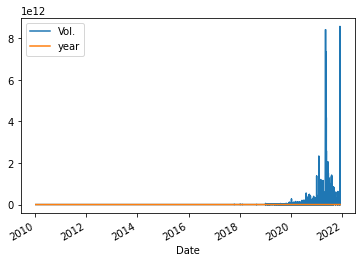

In [ ]:
# Basic plot 
df_ts.plot()

In [ ]:
# For sake of convenience, let's define the top 10 currencies

top_10_currency_names = crypto.groupby(['Currency_Name'])['Vol.'].last().sort_values(ascending=False).head(10).index
data_top_10_currencies = crypto[crypto['Currency_Name'].isin(top_10_currency_names)]
data_top_10_currencies.head(10)

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %,Month,year
3694,Binance_USD,2021-08-24,0.9995,0.9997,0.9998,0.9994,8.839900e+08,-0.02,8,2021
3695,Binance_USD,2021-08-23,0.9997,0.9993,0.9998,0.9992,1.060000e+09,0.05,8,2021
3696,Binance_USD,2021-08-22,0.9992,0.9993,0.9994,0.9992,6.415000e+08,-0.02,8,2021
3697,Binance_USD,2021-08-21,0.9994,0.9997,0.9998,0.9991,8.494900e+08,-0.03,8,2021
3698,Binance_USD,2021-08-20,0.9997,1.0000,1.0001,0.9997,1.090000e+09,-0.03,8,2021
3699,Binance_USD,2021-08-19,1.0000,0.9998,1.0002,0.9997,1.140000e+09,0.03,8,2021
3700,Binance_USD,2021-08-18,0.9997,1.0000,1.0001,0.9996,1.100000e+09,-0.03,8,2021
3701,Binance_USD,2021-08-17,1.0000,0.9997,1.0001,0.9996,1.210000e+09,0.03,8,2021
3702,Binance_USD,2021-08-16,0.9997,0.9992,0.9999,0.9992,1.100000e+09,0.04,8,2021
3703,Binance_USD,2021-08-15,0.9993,0.9993,0.9995,0.9991,6.615600e+08,0.00,8,2021


Text(0.5, 1.0, 'Top 10 volume crypto')

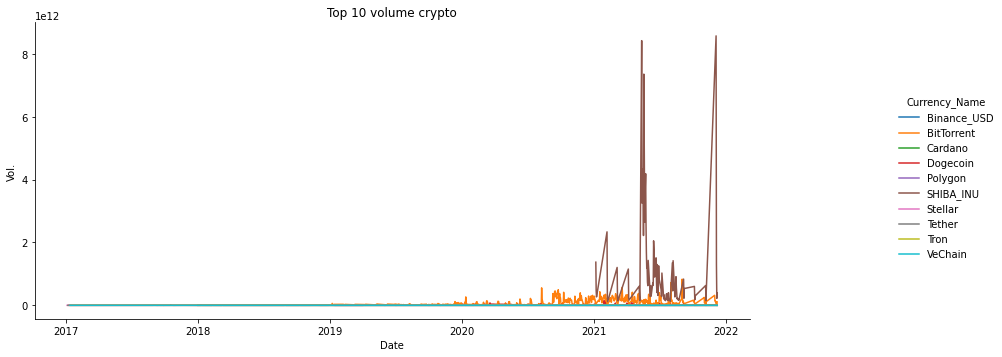

In [ ]:
g = sns.relplot(x = 'Date', y = 'Vol.', kind = 'line', data = data_top_10_currencies, hue = 'Currency_Name')
g.fig.set_figwidth(15)
g.ax.set_title("Top 10 volume crypto")

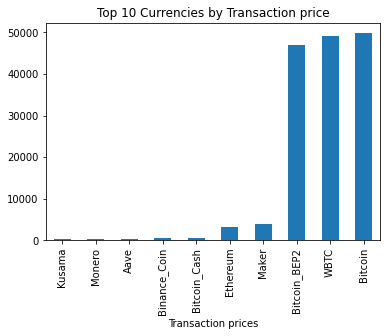

In [ ]:
bx = crypto.groupby(['Currency_Name'])['Price'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='bar');
bx.set_xlabel("Transaction prices");
plt.title("Top 10 Currencies by Transaction price");

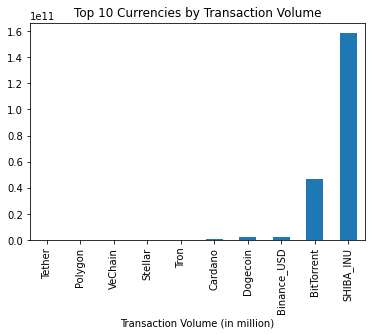

In [ ]:
ax = crypto.groupby(['Currency_Name'])['Vol.'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='bar');
ax.set_xlabel("Transaction Volume (in million)");
plt.title("Top 10 Currencies by Transaction Volume");

In [ ]:
top_10_C = crypto.groupby(['Currency_Name'])['Change %'].last().sort_values(ascending=False).head(10).index
data_top_10_changes = crypto[crypto['Currency_Name'].isin(top_10_C )]
data_top_10_changes.head(10)

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %,Month,year
2032,Avalanche,2020-12-25,2.95,3.12,3.12,2.90,870250.0,-4.80,12,2020
2033,Avalanche,2020-12-26,2.92,2.95,2.95,2.87,476020.0,-1.15,12,2020
2034,Avalanche,2020-12-27,2.90,2.92,3.03,2.90,566730.0,-0.52,12,2020
2035,Avalanche,2020-12-28,2.96,2.90,3.02,2.89,932710.0,1.90,12,2020
2036,Avalanche,2020-12-29,2.92,2.96,2.96,2.87,831350.0,-1.11,12,2020
2037,Avalanche,2020-12-30,2.92,2.92,2.92,2.86,443750.0,-0.29,12,2020
2038,Avalanche,2020-12-31,3.17,2.92,3.17,2.82,859070.0,8.84,12,2020
2039,Avalanche,2021-01-01,3.65,3.17,3.69,3.06,3820000.0,15.09,1,2021
2040,Avalanche,2021-02-01,3.50,3.67,3.75,3.41,1770000.0,-4.30,2,2021
2041,Avalanche,2021-03-01,3.47,3.50,3.75,3.47,989320.0,-0.69,3,2021
